In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

num_classes = 10
img_rows, img_cols = 32, 32
num_channels = 1
input_shape = (img_rows, img_cols, num_channels)

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data() #load cifar10 dataset
x_train, x_test = x_train / 255.0, x_test / 255.0 #normalize to 1
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3) #reshape the train array to samples, 32, 32, 3
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3) #reshape the test array to samples, 32, 32, 3

## TODO: Load the base of the model

In [6]:
conv_base = tf.keras.applications.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))
#load vgg16 with weights from imagenet,include top false, input shape (32,32,3)
conv_base.trainable = False #
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

## TODO: Add layers

In [7]:
modeltop = tf.keras.models.Sequential()
modeltop.add(tf.keras.layers.Flatten()) #flatten
modeltop.add(tf.keras.layers.Dense(256, activation='relu', input_dim=4 * 4 * 512)) #dense layer units 256, activation relu, imput dimension 4*4*12
modeltop.add(tf.keras.layers.Dropout(0.5)) #50% dropout
modeltop.add(tf.keras.layers.Dense(10, activation='sigmoid')) #dense layer number of classess, activation sigmoid

modelfull = tf.keras.models.Sequential([conv_base,modeltop]) #join the two sets of layers
modelfull.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
sequential_2 (Sequential)    (None, 10)                133898    
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


## TODO: Compile model and fit model

In [8]:
modelfull.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #optimizer sgd, loss sparse categorical crossentropy, metric accurcary
callbacks = [tf.keras.callbacks.TensorBoard('.\\keras_lenet_transfer')] #windows
#callbacks = [tf.keras.callbacks.TensorBoard('./keras_lenet')] #linux
modelfull.fit(x_train, y_train, epochs=2, verbose=1, validation_data=(x_test, y_test), callbacks=callbacks)

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
36672/50000 [=====================>........] - ETA: 2:06 - loss: 2.0659 - accuracy: 0.2538

KeyboardInterrupt: 

In [12]:
modelfull.save('model_cifar.h5')

In [13]:
model2 = tf.keras.models.load_model('model_cifar.h5')

In [14]:
x_train_image = x_train[4].reshape(1,32,32,3)
predict_array = model2.predict(x_train_image)
predict_array

array([[0.08481207, 0.05247363, 0.00990808, 0.00237447, 0.00567326,
        0.00120762, 0.00126776, 0.00252268, 0.47464404, 0.02215589]],
      dtype=float32)

In [15]:
np.amax(predict_array)

0.47464404

In [16]:
np.argmax(predict_array)

8

## TODO: Show image number 4

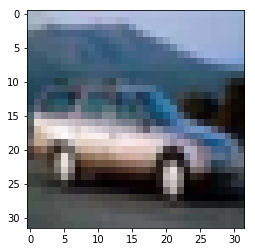

In [17]:
#x_train_show = x_train[4].reshape(32,32,3)
plt.imshow(x_train[4])
#plt.colorbar()
plt.show()